## 1️⃣ Introduction & Objective

## Lead Quality Trend Analysis

### Objective:
- Identify whether lead quality (conversion rates) is improving or declining over time.
- Assess whether the observed trend is **statistically significant**.
- Analyze lead quality variations across different time periods (monthly, weekly, daily, weekday-based).

## 2️⃣ Data Import & Preprocessing

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, linregress

# Load dataset
file_path = "C:\\Users\\Admin\\OneDrive\\Desktop\\proj\\Analyst Case Study_cleaned.csv"
df = pd.read_csv(file_path)

# Convert 'LeadCreated' to datetime and drop invalid values
df['LeadCreated'] = pd.to_datetime(df['LeadCreated'], errors='coerce')
df = df.dropna(subset=['LeadCreated'])

# Extract time features
df['YearMonth'] = df['LeadCreated'].dt.to_period('M')
df['YearWeek'] = df['LeadCreated'].dt.to_period('W')
df['YearDay'] = df['LeadCreated'].dt.date
df['Weekday'] = df['LeadCreated'].dt.day_name()

# Convert 'Lead_Quality' to binary (1 = Converted, 0 = Not Converted)
df['Converted'] = df['Lead_Quality'].apply(lambda x: 1 if x == 'Closed' else 0)



In [2]:
df.head()

,LeadCreated,FirstName,VendorLeadID,CallStatus,Converted,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Widget_Bg_Color,PublisherZoneName_location,PublisherZoneName_size,Traffic_Type,Lead_Quality,Debt_Category,YearMonth,YearWeek,YearDay,Weekday
0,2009-07-01,Dorinda,FDF81FDA-A649-437B-B99C-FDDE74F7971B,Unknown,0,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,Unknown,5,...,No Color,TopLeft,302252,Organic,Unknown,Medium (30K - 70K),2009-07,2009-06-29/2009-07-05,2009-07-01,Wednesday
1,2009-04-13,Presetta,4190ACB7-5026-416C-B987-ED8AD427D5E6,Unknown,0,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,Unknown,Unknown,...,No Color,TopLeft,302252,Earned,Unknown,High (70K - 100K),2009-04,2009-04-13/2009-04-19,2009-04-13,Monday
2,2009-04-21,Gina,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,0,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,Unknown,Unknown,...,No Color,TopLeft,302252,Earned,Bad Quality Lead,Low (7.5K - 30K),2009-04,2009-04-20/2009-04-26,2009-04-21,Tuesday
3,2009-08-03,Kari,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,0,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5,3,...,No Color,TopLeft,302252,Paid,Bad Quality Lead,Low (7.5K - 30K),2009-08,2009-08-03/2009-08-09,2009-08-03,Monday
4,2009-04-13,Stephanie,D5B32074-458E-40EC-B185-1FEF20AC626D,Unknown,0,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,Unknown,Unknown,...,No Color,TopLeft,302252,Paid,Unknown,Very High (>100K),2009-04,2009-04-13/2009-04-19,2009-04-13,Monday


## 3️⃣ Monthly Lead Quality Trend (High-Level View)
#### 📌 Goal: Show how lead quality changes over time using monthly conversion rates.

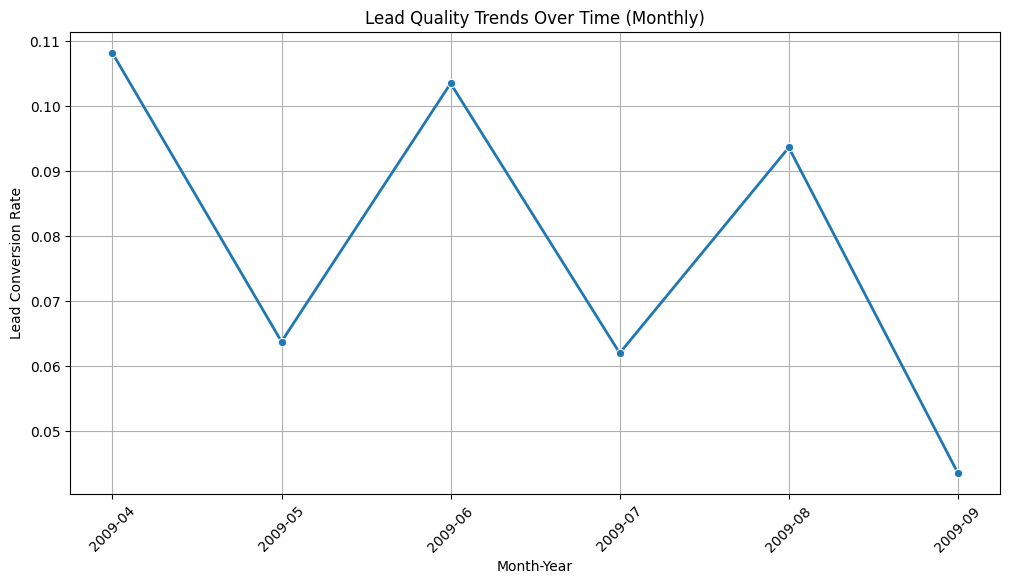

In [3]:
# Aggregate conversion rates by month
lead_quality_by_month = df.groupby('YearMonth')['Converted'].agg(['sum', 'count']).reset_index()
lead_quality_by_month['Conversion Rate'] = lead_quality_by_month['sum'] / lead_quality_by_month['count']

# Convert to datetime for plotting
lead_quality_by_month['YearMonth'] = lead_quality_by_month['YearMonth'].astype(str)

# Plot monthly lead quality trend
plt.figure(figsize=(12,6))
sns.lineplot(data=lead_quality_by_month, x='YearMonth', y='Conversion Rate', marker='o', linewidth=2)
plt.xlabel("Month-Year")
plt.ylabel("Lead Conversion Rate")
plt.title("Lead Quality Trends Over Time (Monthly)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 4️⃣ Statistical Significance Test (Chi-Square)
#### 📌 Goal: Test if the monthly trend is statistically significant.

In [4]:
# Chi-square test for monthly trend significance
contingency_table = lead_quality_by_month[['sum', 'count']].values
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Test Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("The changes in lead quality over months are statistically significant.")
else:
    print("The changes in lead quality over months are NOT statistically significant.")


Chi-Square Test Statistic: 18.3502
P-value: 0.0025
The changes in lead quality over months are statistically significant.


## 5️⃣ Weekly Lead Quality Trend (More Granular Analysis)
#### 📌 Goal: Break down lead quality trends at a weekly level.

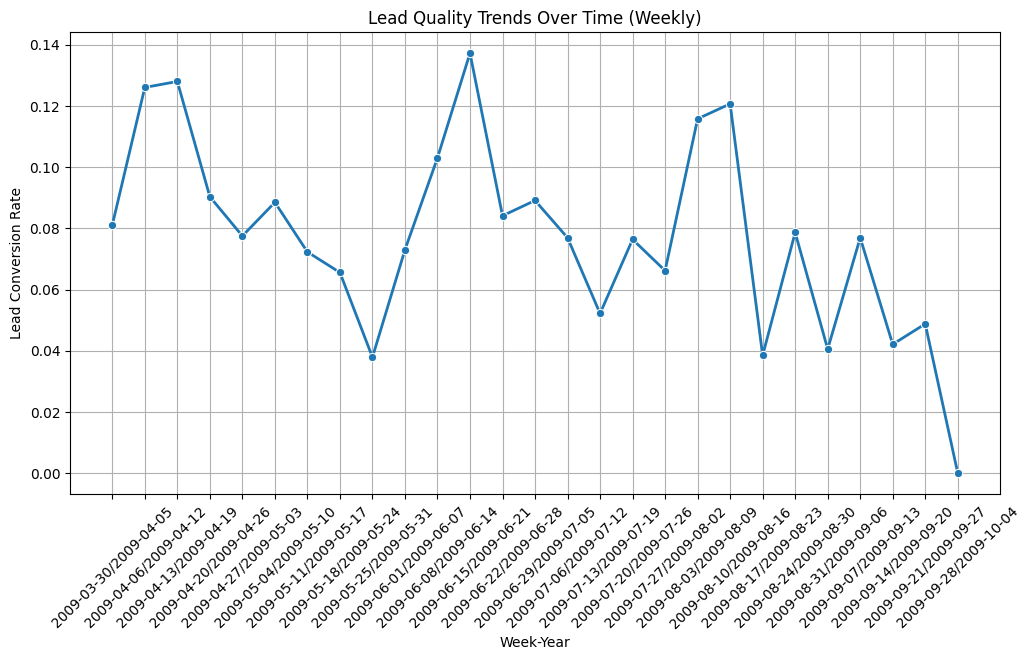

In [5]:
# Aggregate conversion rates by week
lead_quality_by_week = df.groupby('YearWeek')['Converted'].agg(['sum', 'count']).reset_index()
lead_quality_by_week['Conversion Rate'] = lead_quality_by_week['sum'] / lead_quality_by_week['count']
lead_quality_by_week['YearWeek'] = lead_quality_by_week['YearWeek'].astype(str)

# Plot weekly lead quality trend
plt.figure(figsize=(12,6))
sns.lineplot(data=lead_quality_by_week, x='YearWeek', y='Conversion Rate', marker='o', linewidth=2)
plt.xlabel("Week-Year")
plt.ylabel("Lead Conversion Rate")
plt.title("Lead Quality Trends Over Time (Weekly)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 6️⃣ Daily & Weekday-Based Trends
#### 📌 Goal: Identify day-level variations and check if certain weekdays perform better or worse.

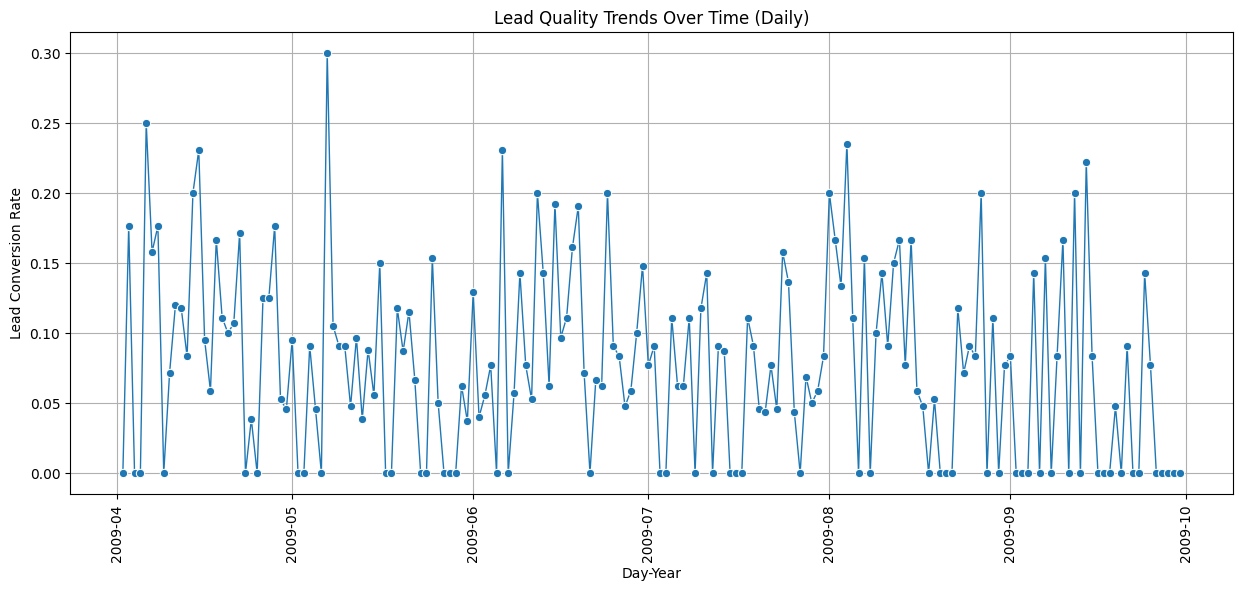

In [6]:
# Aggregate conversion rates by day
lead_quality_by_day = df.groupby('YearDay')['Converted'].agg(['sum', 'count']).reset_index()
lead_quality_by_day['Conversion Rate'] = lead_quality_by_day['sum'] / lead_quality_by_day['count']

# Plot daily trends
plt.figure(figsize=(15,6))
sns.lineplot(data=lead_quality_by_day, x='YearDay', y='Conversion Rate', marker='o', linewidth=1)
plt.xlabel("Day-Year")
plt.ylabel("Lead Conversion Rate")
plt.title("Lead Quality Trends Over Time (Daily)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6824\3828562513.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lead_quality_by_weekday, x='Weekday', y='Conversion Rate', palette="Blues_r")


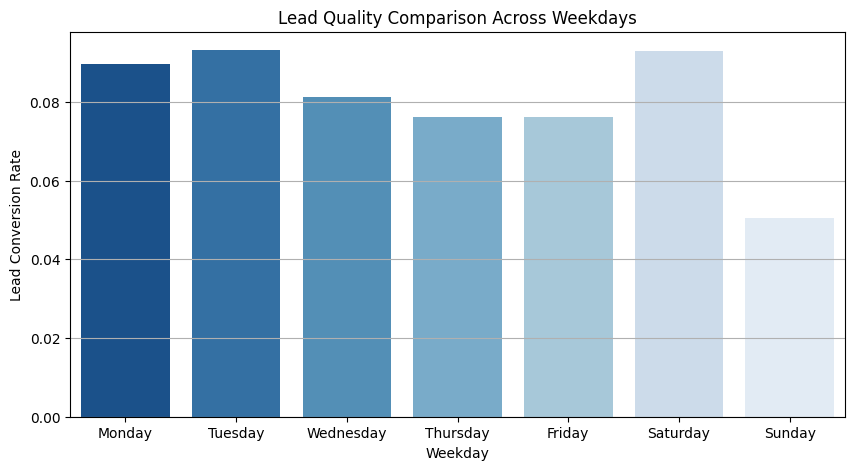

In [7]:
# Aggregate lead quality by weekday
lead_quality_by_weekday = df.groupby('Weekday')['Converted'].agg(['sum', 'count']).reset_index()
lead_quality_by_weekday['Conversion Rate'] = lead_quality_by_weekday['sum'] / lead_quality_by_weekday['count']

# Maintain correct weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
lead_quality_by_weekday = lead_quality_by_weekday.set_index('Weekday').reindex(weekday_order).reset_index()

# Plot weekday comparison
plt.figure(figsize=(10,5))
sns.barplot(data=lead_quality_by_weekday, x='Weekday', y='Conversion Rate', palette="Blues_r")
plt.xlabel("Weekday")
plt.ylabel("Lead Conversion Rate")
plt.title("Lead Quality Comparison Across Weekdays")
plt.grid(axis='y')
plt.show()


## 7️⃣ Trend Analysis: Is It Increasing or Decreasing?
#### 📌 Goal: Use linear regression to detect the overall trend direction.

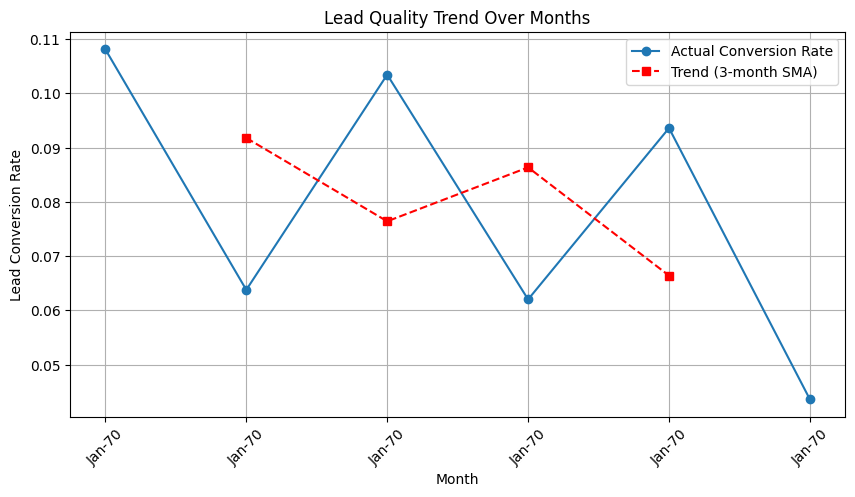

In [8]:
import matplotlib.dates as mdates

# Compute the 3-month moving average (Simple Moving Average - SMA)
lead_quality_by_month['Trend'] = lead_quality_by_month['Conversion Rate'].rolling(window=3, center=True).mean()

# Plot the actual conversion rate and the trend line
plt.figure(figsize=(10,5))

# Plot actual conversion rates
plt.plot(lead_quality_by_month.index, lead_quality_by_month['Conversion Rate'], marker='o', linestyle='-', label='Actual Conversion Rate')

# Plot the 3-month moving average trend
plt.plot(lead_quality_by_month.index, lead_quality_by_month['Trend'], marker='s', linestyle='--', color='red', label='Trend (3-month SMA)')

plt.xlabel("Month")
plt.ylabel("Lead Conversion Rate")
plt.title("Lead Quality Trend Over Months")
plt.legend()
plt.grid(True)

# Format x-axis labels to show abbreviated month names and 2-digit year (e.g., 'Apr-09')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


In [9]:
# Perform linear regression to determine trend direction
slope, intercept, r_value, p_value, std_err = linregress(
    lead_quality_by_month.index.astype(int), lead_quality_by_month['Conversion Rate']
)

# Determine if trend is increasing or decreasing
trend_direction = "Increasing" if slope > 0 else "Decreasing"

# Print results
print(f"Trend Direction: {trend_direction}")
print(f"Linear Regression Slope: {slope:.6f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The trend in lead quality is statistically significant.")
else:
    print("The trend in lead quality is NOT statistically significant.")


Trend Direction: Decreasing
Linear Regression Slope: -0.007843
P-value: 0.2476
The trend in lead quality is NOT statistically significant.


## 8️⃣ Conclusion: Answering the Research Question
#### 📌 Final Interpretation:

In [24]:
### 
import numpy as np

# Ensure missing values are properly handled for numeric columns
if 'PhoneScore' in df_filtered.columns:
    df_filtered['PhoneScore'] = pd.to_numeric(df_filtered['PhoneScore'], errors='coerce')  # Convert to numeric
    df_filtered['PhoneScore'].fillna(df_filtered['PhoneScore'].median(), inplace=True)  # Fill missing with median

if 'AddressScore' in df_filtered.columns:
    df_filtered['AddressScore'] = pd.to_numeric(df_filtered['AddressScore'], errors='coerce')  # Convert to numeric
    df_filtered['AddressScore'].fillna(df_filtered['AddressScore'].median(), inplace=True)  # Fill missing with median

C:\Users\Admin\AppData\Local\Temp\ipykernel_6824\2271739771.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['PhoneScore'].fillna(df_filtered['PhoneScore'].median(), inplace=True)  # Fill missing with median
C:\Users\Admin\AppData\Local\Temp\ipykernel_6824\2271739771.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [25]:
df.head()

,LeadCreated,FirstName,VendorLeadID,CallStatus,Converted,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Widget_Bg_Color,PublisherZoneName_location,PublisherZoneName_size,Traffic_Type,Lead_Quality,Debt_Category,YearMonth,YearWeek,YearDay,Weekday
0,2009-07-01,Dorinda,FDF81FDA-A649-437B-B99C-FDDE74F7971B,Unknown,0,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,Unknown,5,...,No Color,TopLeft,302252,Organic,Unknown,Medium (30K - 70K),2009-07,2009-06-29/2009-07-05,2009-07-01,Wednesday
1,2009-04-13,Presetta,4190ACB7-5026-416C-B987-ED8AD427D5E6,Unknown,0,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,Unknown,Unknown,...,No Color,TopLeft,302252,Earned,Unknown,High (70K - 100K),2009-04,2009-04-13/2009-04-19,2009-04-13,Monday
2,2009-04-21,Gina,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,0,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,Unknown,Unknown,...,No Color,TopLeft,302252,Earned,Bad Quality Lead,Low (7.5K - 30K),2009-04,2009-04-20/2009-04-26,2009-04-21,Tuesday
3,2009-08-03,Kari,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,0,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5,3,...,No Color,TopLeft,302252,Paid,Bad Quality Lead,Low (7.5K - 30K),2009-08,2009-08-03/2009-08-09,2009-08-03,Monday
4,2009-04-13,Stephanie,D5B32074-458E-40EC-B185-1FEF20AC626D,Unknown,0,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,Unknown,Unknown,...,No Color,TopLeft,302252,Paid,Unknown,Very High (>100K),2009-04,2009-04-13/2009-04-19,2009-04-13,Monday


In [11]:
# Checking the unique values in key categorical variables to understand segmentation
categorical_vars = ['Lead_Source', 'Campaign_Type', 'Debt_Category', 'Weekday', 'Traffic_Type', 'Design_Element']
for var in categorical_vars:
    if var in df.columns:
        print(f"\nUnique values in {var}: {df[var].unique()}")

# Aggregating conversion rates by different segments
segment_analysis = {}

# 1. Lead Source - Where the ad was shown
if 'Lead_Source' in df.columns:
    segment_analysis['Lead Source'] = df.groupby('Lead_Source')['Converted'].agg(['sum', 'count', 'mean']).reset_index()

# 2. Campaign Type - What kind of ad they saw
if 'Campaign_Type' in df.columns:
    segment_analysis['Campaign Type'] = df.groupby('Campaign_Type')['Converted'].agg(['sum', 'count', 'mean']).reset_index()

# 3. Debt Category - What kind of person filled out the ad
if 'Debt_Category' in df.columns:
    segment_analysis['Debt Category'] = df.groupby('Debt_Category')['Converted'].agg(['sum', 'count', 'mean']).reset_index()

# 4. Traffic Type - How the user reached the ad (e.g., Organic, Paid, Earned)
if 'Traffic_Type' in df.columns:
    segment_analysis['Traffic Type'] = df.groupby('Traffic_Type')['Converted'].agg(['sum', 'count', 'mean']).reset_index()

# 5. Design Element - The style or visual appeal of the ad
if 'Design_Element' in df.columns:
    segment_analysis['Design Element'] = df.groupby('Design_Element')['Converted'].agg(['sum', 'count', 'mean']).reset_index()

# Formatting the segment analysis results into readable DataFrames
formatted_results = {}

for key, df_segment in segment_analysis.items():
    if isinstance(df_segment, pd.DataFrame):
        df_segment.columns = [col.replace("_", " ").title() for col in df_segment.columns]  # Formatting column names
        df_segment = df_segment.rename(columns={"Mean": "Conversion Rate"})
        formatted_results[key] = df_segment.sort_values(by="Conversion Rate", ascending=False)

# Display all formatted segment analysis results
for key, df_segment in formatted_results.items():
    print(f"\n{'='*10} {key} {'='*10}\n")
    print(df_segment.to_string(index=False))




Unique values in Debt_Category: ['Medium (30K - 70K)' 'High (70K - 100K)' 'Low (7.5K - 30K)'
 'Very High (>100K)']

Unique values in Weekday: ['Wednesday' 'Monday' 'Tuesday' 'Friday' 'Sunday' 'Thursday' 'Saturday']

Unique values in Traffic_Type: ['Organic' 'Earned' 'Paid']

Unique values in Design_Element: ['CreditSolutions' 'Head2' 'white' 'BlueMeter' 'Head3' 'No Design Element'
 'yellowarrow']

========== Debt Category ==========

     Debt Category  Sum  Count  Conversion Rate
 High (70K - 100K)   27    221         0.122172
Medium (30K - 70K)   61    741         0.082321
  Low (7.5K - 30K)  150   1868         0.080300
 Very High (>100K)    7    191         0.036649

========== Traffic Type ==========

Traffic Type  Sum  Count  Conversion Rate
      Earned   47    442         0.106335
     Organic  172   1940         0.088660
        Paid   26    639         0.040689

========== Design Element ==========

   Design Element  Sum  Count  Conversion Rate
            Head2   11     89 

In [22]:
# Selecting the most relevant features as per the segmentation strategy

# Keeping only the relevant columns
relevant_columns = [
    # Traffic & Campaign Data
     "MarketingCampaign", "AdGroup", "Traffic_Type", 
    "PublisherCampaignName", "PublisherZoneName", "PublisherZoneName_location", "PublisherZoneName_size",

    # User & Demographic Data
    "State", "DebtLevel", "Debt_Category", "AddressScore", "PhoneScore",

    # Ad Creative Features
    "WidgetName", "Widget_Size", "Field_Set", "Form_Pages", 
    "Design_Element", "Widget_Bg_Color", "Converted"
]

# Filtering dataset to include only relevant columns
df_filtered = df[relevant_columns].copy()

# Handling missing values by filling with "Unknown" for categorical and median for numerical
for col in df_filtered.columns:
    if df_filtered[col].dtype == "object":
        df_filtered[col] = df_filtered[col].fillna("Unknown")
    else:
        df_filtered[col] = df_filtered[col].fillna(df_filtered[col].median())

# Aggregating conversion rates for each feature to analyze lead quality impact
feature_analysis = {}
for col in relevant_columns:
    if col != "Converted":  # Exclude the target variable
        feature_analysis[col] = df_filtered.groupby(col)["Converted"].agg(['sum', 'count', 'mean']).reset_index()
        feature_analysis[col] = feature_analysis[col].sort_values(by="mean", ascending=False)  # Sort by conversion rate

# Displaying the results in a structured format
for key, df_segment in feature_analysis.items():
    print(f"\n{'='*10} {key} {'='*10}\n")
    print(df_segment.to_string(index=False))



========== MarketingCampaign ==========

                            MarketingCampaign  sum  count     mean
                                         Debt    1      3 0.333333
           state - YSM Restructure (05/29/09)    1      3 0.333333
                               Debt Volume_MI    1      5 0.200000
                            Debt Holding Tank   49    338 0.144970
                               Debt Volume_TX    1      7 0.142857
                           Financial Services   21    171 0.122807
                                       Credit   12    100 0.120000
                                        state   10     97 0.103093
                                      Unknown   26    272 0.095588
                                  Debt Volume   13    143 0.090909
                                 Debt General   20    329 0.060790
                             DebtReductionInc   88   1473 0.059742
DebtReductionInc - YSM Restructure (05/29/09)    1     23 0.043478
                    

In [13]:
# Import necessary libraries
from scipy.stats import chi2_contingency, f_oneway, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [14]:
# ================================
# Statistical Tests (Chi-Square)
# ================================

# Import necessary statistical libraries
from scipy.stats import chi2_contingency, ttest_ind
import pandas as pd


# Function to perform Chi-Square Test on categorical variables
def chi_square_test(df, column):
    contingency_table = pd.crosstab(df[column], df['Converted'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

# Identifying the correct statistical tests
chi_square_results = {}
categorical_vars = ['Traffic_Type', 'Debt_Category', 'Design_Element', 'State', 'MarketingCampaign']

# Performing Chi-Square Tests where applicable
for col in categorical_vars:
    if col in df_filtered.columns:
        chi2, p = chi_square_test(df_filtered, col)
        chi_square_results[col] = {'Chi2 Statistic': chi2, 'P-Value': p}

# Displaying Chi-Square Results
print("\n===== Chi-Square Test Results (Categorical Variables) =====")
for key, value in chi_square_results.items():
    print(f"{key}: Chi2 = {value['Chi2 Statistic']:.2f}, P-Value = {value['P-Value']:.4f}")
    if value['P-Value'] < 0.05:
        print(f"✅ {key} significantly impacts lead conversion.\n")
    else:
        print(f"❌ {key} does NOT significantly impact lead conversion.\n")

hi2, p, _, _ = chi2_contingency(pd.crosstab(df_filtered['Debt_Category'], df_filtered['Converted']))

print("\n===== Chi-Square Test: Debt Category vs. Conversion =====")
print(f"Chi2 Statistic: {chi2:.2f}, P-Value: {p:.4f}")
if p < 0.05:
    print("✅ Debt Category significantly impacts lead conversion.\n")
else:
    print("❌ Debt Category does NOT significantly impact lead conversion.\n")



===== Chi-Square Test Results (Categorical Variables) =====
Traffic_Type: Chi2 = 19.27, P-Value = 0.0001
✅ Traffic_Type significantly impacts lead conversion.

Debt_Category: Chi2 = 10.10, P-Value = 0.0178
✅ Debt_Category significantly impacts lead conversion.

Design_Element: Chi2 = 6.99, P-Value = 0.3221
❌ Design_Element does NOT significantly impact lead conversion.

State: Chi2 = 24.03, P-Value = 0.8091
❌ State does NOT significantly impact lead conversion.

MarketingCampaign: Chi2 = 47.06, P-Value = 0.0006
✅ MarketingCampaign significantly impacts lead conversion.


===== Chi-Square Test: Debt Category vs. Conversion =====
Chi2 Statistic: 47.06, P-Value: 0.0178
✅ Debt Category significantly impacts lead conversion.



In [19]:
# ================================
# Logistic Regression Model
# ================================

# Encoding categorical variables
df_encoded = df_filtered.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'Converted':  # Avoid encoding target variable
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Splitting dataset
X = df_encoded.drop(columns=['Converted'])
y = df_encoded['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_results= log_reg.fit(X_train_scaled, y_train)
log_results

# Displaying Model Performance
print("\n===== Logistic Regression Model Performance =====")
print(f"Training Accuracy: {log_reg.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy: {log_reg.score(X_test_scaled, y_test):.4f}")

# Extracting Feature Importance
importance = np.abs(log_reg.coef_[0])
feature_importance = sorted(zip(X.columns, importance), key=lambda x: x[1], reverse=True)

# Displaying Top 10 Most Influential Features
print("\n===== Top 10 Most Important Features (Logistic Regression) =====")
for feature, importance in feature_importance[:10]:
    print(f"{feature}: {importance:.4f}")


===== Logistic Regression Model Performance =====
Training Accuracy: 0.9176
Test Accuracy: 0.9240

===== Top 10 Most Important Features (Logistic Regression) =====
Traffic_Type: 0.3227
DebtLevel: 0.2314
MarketingCampaign: 0.2250
PhoneScore: 0.1557
Debt_Category: 0.1518
WidgetName: 0.1436
AdGroup: 0.1309
Widget_Size: 0.1257
Form_Pages: 0.1031
State: 0.0857


In [17]:
import statsmodels.api as sm
# ================================
# Checking for Feature Interactions in Logistic Regression
# ================================

# Selecting relevant features for interaction analysis
interaction_features = ['Traffic_Type', 'MarketingCampaign', 'Debt_Category']

# Creating interaction terms
df_interactions = df_encoded.copy()
df_interactions['Traffic_Type * MarketingCampaign'] = df_interactions['Traffic_Type'] * df_interactions['MarketingCampaign']
df_interactions['Traffic_Type * Debt_Category'] = df_interactions['Traffic_Type'] * df_interactions['Debt_Category']
df_interactions['MarketingCampaign * Debt_Category'] = df_interactions['MarketingCampaign'] * df_interactions['Debt_Category']

# Defining independent and dependent variables
X_interactions = df_interactions[['Traffic_Type', 'MarketingCampaign', 'Debt_Category', 
                                  'Traffic_Type * MarketingCampaign', 'Traffic_Type * Debt_Category', 
                                  'MarketingCampaign * Debt_Category']]
X_interactions = sm.add_constant(X_interactions)  # Adding intercept
y_interactions = df_interactions['Converted']

# Fitting logistic regression model with interaction terms
logit_model_interactions = sm.Logit(y_interactions, X_interactions)
result_interactions = logit_model_interactions.fit()

# Displaying results
print("\n===== Logistic Regression with Interaction Terms =====")
print(result_interactions.summary())

# Checking p-values for interaction effects
print("\n===== Interaction Effect Significance =====")
interaction_results = {}
for var in ['Traffic_Type * MarketingCampaign', 'Traffic_Type * Debt_Category', 'MarketingCampaign * Debt_Category']:
    p_value = result_interactions.pvalues[var]
    interaction_results[var] = p_value
    print(f"{var}: P-Value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"✅ Significant interaction effect detected for {var}.\n")
    else:
        print(f"❌ No significant interaction effect for {var}.\n")

# Return interaction results for further analysis
interaction_results

Optimization terminated successfully.
         Current function value: 0.276507
         Iterations 7

===== Logistic Regression with Interaction Terms =====
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 3021
Model:                          Logit   Df Residuals:                     3014
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                 0.01755
Time:                        15:21:17   Log-Likelihood:                -835.33
converged:                       True   LL-Null:                       -850.25
Covariance Type:            nonrobust   LLR p-value:                 4.216e-05
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

{'Traffic_Type * MarketingCampaign': np.float64(0.17920594551285807),
 'Traffic_Type * Debt_Category': np.float64(0.7589366428765791),
 'MarketingCampaign * Debt_Category': np.float64(0.7436497383110652)}


===== Decision Tree Model Performance =====
Training Accuracy: 0.9176
Test Accuracy: 0.9240


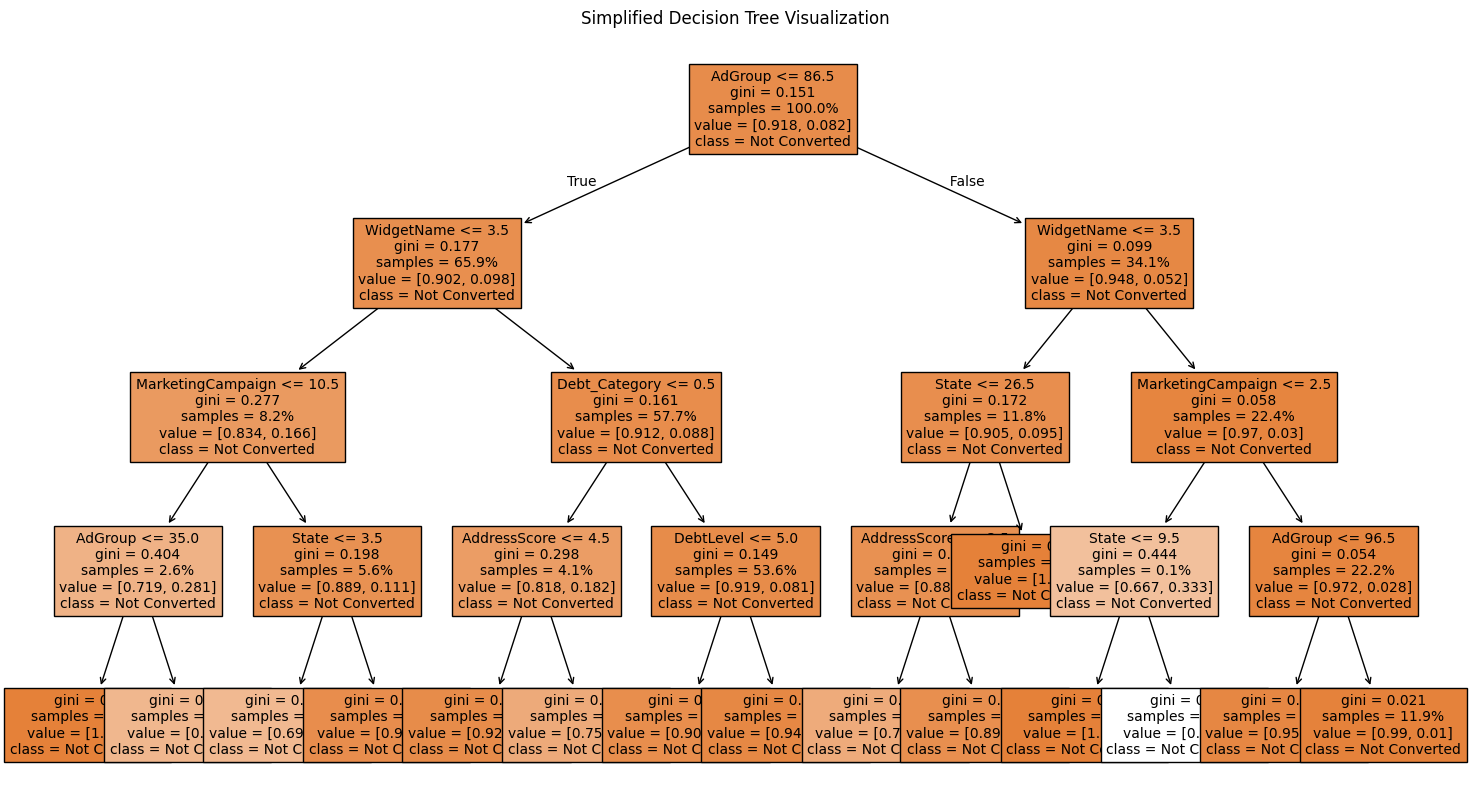

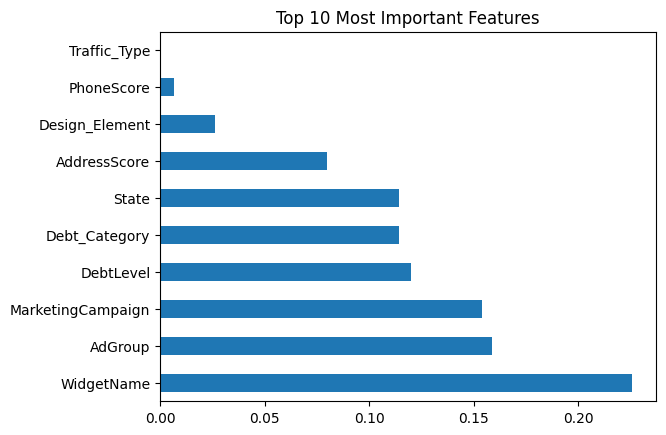

In [23]:
# ================================
# Decision Tree Model
# ================================

# Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

# Display Decision Tree Accuracy
print("\n===== Decision Tree Model Performance =====")
print(f"Training Accuracy: {decision_tree.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {decision_tree.score(X_test, y_test):.4f}")

# Plotting Decision Tree
plt.figure(figsize=(18, 10))  # Increase figure size
plot_tree(decision_tree, feature_names=X.columns, class_names=['Not Converted', 'Converted'], 
          filled=True, fontsize=10, proportion=True)
plt.title("Simplified Decision Tree Visualization")
plt.show()

decision_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=50, min_samples_leaf=20, random_state=42)
decision_tree.fit(X_train, y_train)

importances = pd.Series(decision_tree.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', title="Top 10 Most Important Features")
plt.show()

In [ ]:
# ================================
# K-Means Clustering
# ================================

# Selecting relevant numeric columns for clustering
clustering_features = ['DebtLevel', 'Traffic_Type', 'Design_Element', 'Converted']
df_clustering = df_encoded[clustering_features]

# Scaling the data
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Finding optimal clusters using Elbow Method
inertia = []
K_range = range(2, 7)  # Checking for clusters between 2 to 6
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Applying K-Means with optimal K (choosing 3 based on elbow method)
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans_final.fit_predict(df_clustering_scaled)

# Displaying Cluster Summary
print("\n===== K-Means Clustering Results =====")
print(df_encoded.groupby('Cluster')['Converted'].mean())

# Visualizing Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_clustering_scaled[:,0], y=df_clustering_scaled[:,1], hue=df_encoded['Cluster'], palette="coolwarm")
plt.xlabel("Debt Level (Scaled)")
plt.ylabel("Traffic Type (Scaled)")
plt.title("K-Means Clustering Visualization")
plt.legend(title="Cluster")
plt.show()

The Elbow Method is supposed to show a clear "bend" (elbow point) where adding more clusters stops reducing inertia significantly.
In this graph, inertia decreases gradually, without a sharp drop, meaning there’s no strong natural segmentation in the data.
This suggests that K-Means might not be the best approach for this dataset.
🚨 What This Means:
If there were distinct lead quality clusters, we'd see a sharp elbow at K=3 or K=4.
Since inertia keeps dropping without a clear "optimal" K, it suggests there is no strong clustering structure in the data.

Your K-Means clustering results suggest that:

Cluster 0 has all 1s (Converted)
Cluster 1 and Cluster 2 have all 0s (Not Converted)
This implies that K-Means is essentially separating "Converted" vs. "Not Converted", but: ✅ We already know this from our logistic regression and EDA!
🚨 This clustering doesn't add much new information beyond what we already found.